In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('GermanCredit.csv')

## [8 pts] Drop the 3 columns that contribute the least to the dataset.

These would be the columns with the highest number of non-zero `'none'` values. Break ties by going left to right in columns.


In [2]:
# Count 'none' values per column and drop top 3
none_counts = df.apply(lambda col: (col == 'none').sum())
drop_cols = none_counts.sort_values(ascending=False).head(3).index.tolist()
print("Dropping columns:", drop_cols)
df.drop(columns=drop_cols, inplace=True)


Dropping columns: ['other_parties', 'other_payment_plans', 'own_telephone']


## [4 pts] Remove unnecessary apostrophes (‘) from all string values.


In [3]:
# Strip apostrophes from all string values
df = df.apply(lambda col: col.map(lambda x: x.replace("'", "") if isinstance(x, str) else x))



## [5 pts] Map values in `checking_status` column.


In [4]:
checking_map = {
    "no checking": "No Checking",
    "<0": "Low",
    "0<=X<200": "Medium",
    ">=200": "High"
}
df["checking_status"] = df["checking_status"].map(checking_map)


## [5 pts] Map values in `savings_status` column.


In [5]:
savings_map = {
    "no known savings": "No Savings",
    "<100": "Low",
    "100<=X<500": "Medium",
    "500<=X<1000": "High",
    ">=1000": "High"
}
df["savings_status"] = df["savings_status"].map(savings_map)


## [4 pts] Change `class` column values.


In [6]:
df["class"] = df["class"].map({"good": 1, "bad": 0})


## [5 pts] Change `employment` values.


In [7]:
employment_map = {
    "unemployed": "Unemployed",
    "<1": "Amateur",
    "1<=X<4": "Professional",
    "4<=X<7": "Experienced",
    ">=7": "Expert"
}
df["employment"] = df["employment"].map(employment_map)


## [3 pts] Foreign Worker vs Credit Class

Use `pd.crosstab()` to count how many foreign workers (yes/no) fall into each credit class (1 = good, 0 = bad).


In [8]:
pd.crosstab(df["foreign_worker"], df["class"])


class,0,1
foreign_worker,,
no,4,33
yes,296,667


## [2 pts] Employment vs Savings Status

Use `pd.crosstab()` to count how many people are in each employment category for each savings status level.


In [9]:
pd.crosstab(df["employment"], df["savings_status"])


savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


## [4 pts] Average Credit Amount for Single Males with 4–7 Years Employment

Find the average `credit_amount` of people with `personal_status` = `'male single'` and `employment` = `'Experienced'`.


In [10]:
avg_credit_amt = df[
    (df["personal_status"] == "male single") & (df["employment"] == "Experienced")
]["credit_amount"].mean()
avg_credit_amt


4142.592592592592

## [4 pts] Average Credit Duration by Job Type

Group the dataset by `job` and calculate the mean of `duration` for each job category.


In [11]:
df.groupby("job")["duration"].mean()


job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

## [4 pts] Most Common Checking and Savings Status for Purpose = Education

Filter rows with purpose `'education'` and find the most common values for `checking_status` and `savings_status`.


In [12]:
edu_df = df[df["purpose"] == "education"]
most_common_checking = edu_df["checking_status"].mode().iloc[0]
most_common_savings = edu_df["savings_status"].mode().iloc[0]

print("Most common checking status:", most_common_checking)
print("Most common savings status:", most_common_savings)


Most common checking status: No Checking
Most common savings status: Low


## [9 pts] Subplots of savings_status and checking_status vs personal_status

Create two bar chart subplots:
- One for savings_status (x-axis) vs. personal_status (y counts)
- One for checking_status (x-axis) vs. personal_status (y counts)

Each personal_status bar should be a different color.


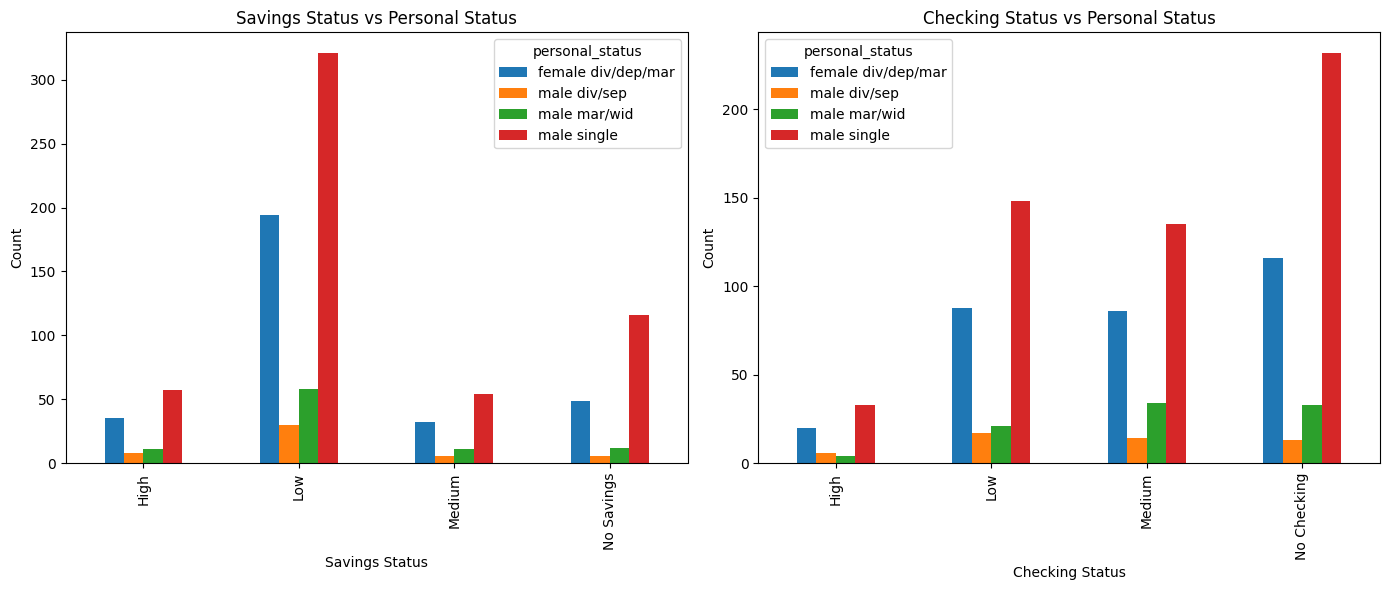

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Savings status vs personal status
savings_counts = pd.crosstab(df['savings_status'], df['personal_status'])
savings_counts.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Savings Status vs Personal Status')
axes[0].set_xlabel('Savings Status')
axes[0].set_ylabel('Count')

# Checking status vs personal status
checking_counts = pd.crosstab(df['checking_status'], df['personal_status'])
checking_counts.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Checking Status vs Personal Status')
axes[1].set_xlabel('Checking Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## [9 pts] Property Magnitude vs Average Age (credit_amount > 4000)

For customers with credit_amount > 4000, plot a bar graph of:
- property_magnitude (x-axis)
- average age (y-axis)


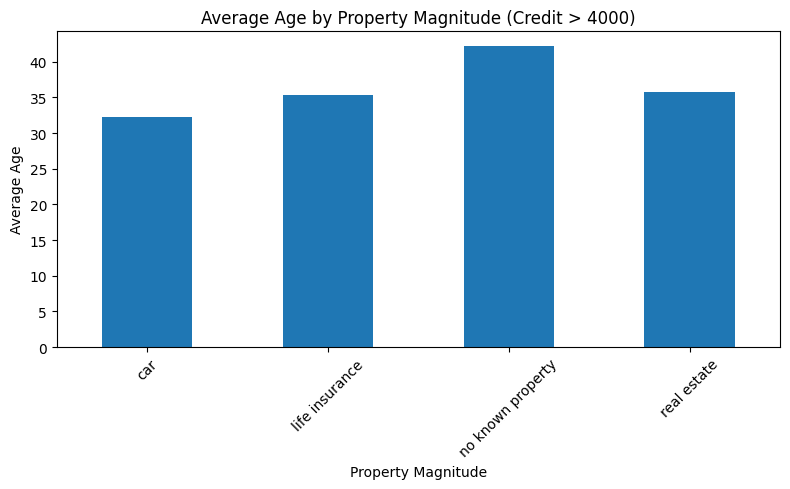

In [14]:
# Filter customers
filtered = df[df['credit_amount'] > 4000]
avg_age = filtered.groupby('property_magnitude')['age'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_age.plot(kind='bar')
plt.title('Average Age by Property Magnitude (Credit > 4000)')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## [6 pts] Pie Charts for "High" Savings Status and Age > 40

Make subplots (1 row, 3 columns) of pie charts for:
- personal_status
- credit_history
- job

Only include people with savings_status = "High" and age > 40.


In [ ]:
subset = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie for personal_status
subset['personal_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Personal Status')

# Pie for credit_history
subset['credit_history'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Credit History')

# Pie for job
subset['job'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('Job')

plt.tight_layout()
plt.show()
